# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
dot = x + 2*y +3*z

In [4]:
# угол между x, y
cosine_alpha = np.dot(x,y) / (np.linalg.norm(x)*np.linalg.norm(y))
print("Угол между x и y в радианах: ", math.acos(cosine_alpha), "Угол в градусах: ", math.acos(cosine_alpha) * 180 / math.pi, sep='\n')

Угол между x и y в радианах: 
0.7853981633974484
Угол в градусах: 
45.00000000000001


In [5]:
# угол между x, z
cosine_alpha = np.dot(x,z) / (np.linalg.norm(x)*np.linalg.norm(z))
print("Угол между x и z в радианах: ", math.acos(cosine_alpha), "Угол в градусах: ", math.acos(cosine_alpha) * 180 / math.pi, sep='\n')

Угол между x и z в радианах: 
0.7853981633974484
Угол в градусах: 
45.00000000000001


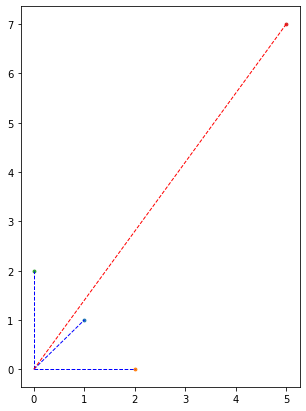

In [6]:
plt.figure(figsize=(5,7))
plt.scatter(x[0], x[1], s=8)
plt.plot([0,x[0]],[0,x[1]],'b--',linewidth=1)
plt.scatter(y[0], y[1], s=8)
plt.plot([0,y[0]],[0,y[1]],'b--',linewidth=1)
plt.scatter(z[0], z[1], s=8)
plt.plot([0,z[0]],[0,z[1]],'b--',linewidth=1)

# dot x + 2y + 3z.
plt.scatter(dot[0], dot[1], s=8)
plt.plot([0,dot[0]],[0,dot[1]],'r--',linewidth=1)

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [7]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJoints = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJoints.sort_values(by=[axis_sort])

df = df[['x','y']].drop_duplicates()

In [64]:
right_hand = np.array(df.iloc[14])
spine = np.array(df.iloc[8] - df.iloc[6])

In [105]:
projection = np.array(df.iloc[8]) + (np.dot(right_hand, spine)/np.linalg.norm(right_hand))*spine
projection

x    0.000464
y    0.143967
dtype: float64

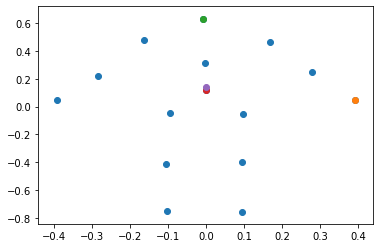

In [103]:
plt.scatter(df.x, df.y)
plt.scatter(right_hand[0], right_hand[1])

plt.scatter(df.iloc[6][0], df.iloc[6][1])
plt.scatter(df.iloc[8][0], df.iloc[8][1])

plt.scatter(projection[0],projection[1])

In [106]:
print(f'Расстояние от правой кисти до позвоночника: {np.linalg.norm(right_hand-projection)}')

Расстояние от правой кисти до позвоночника: 0.4037493048607383


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [17]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [18]:
from numpy import linalg as LA

e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [19]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]
